In [1]:
pwd

'C:\\Users\\BVS Rohith'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
train_data=pd.read_csv('train_ctrUa4K.csv')
test_data=pd.read_csv('test_lAUu6dG.csv')
#submi = pd.read_csv('sample_submission_49d68Cx')

# understanding the dataset

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant analysis

In [8]:
cat_var=['Gender','Married','Self_Employed','Credit_History']


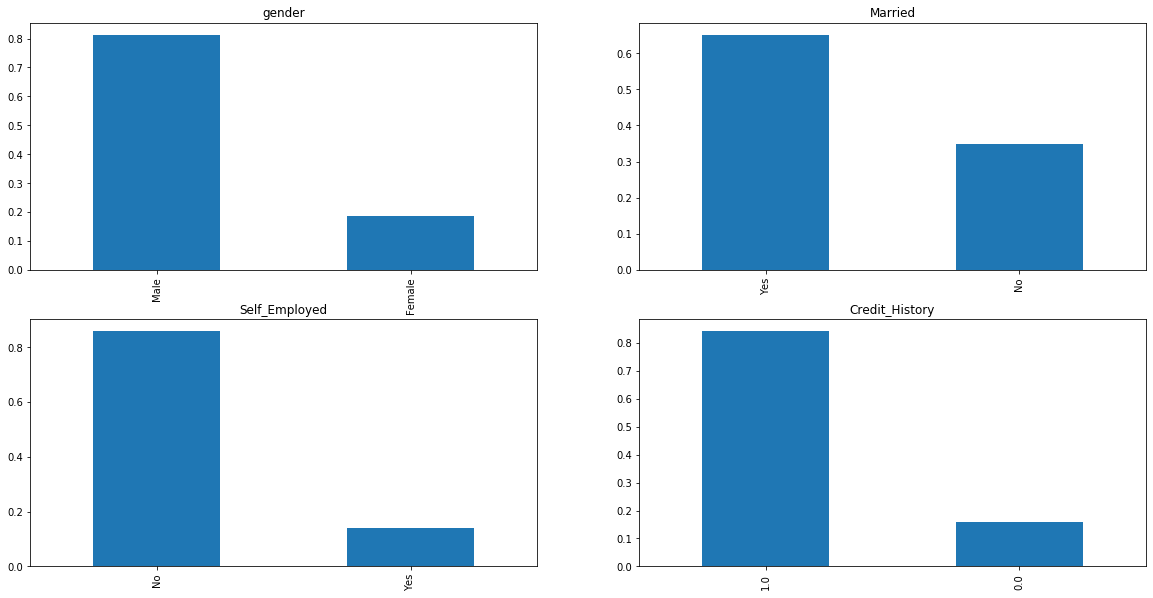

In [9]:
plt.figure(1)
plt.subplot(2,2,1)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='gender')
plt.subplot(2,2,2)
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(2,2,4)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

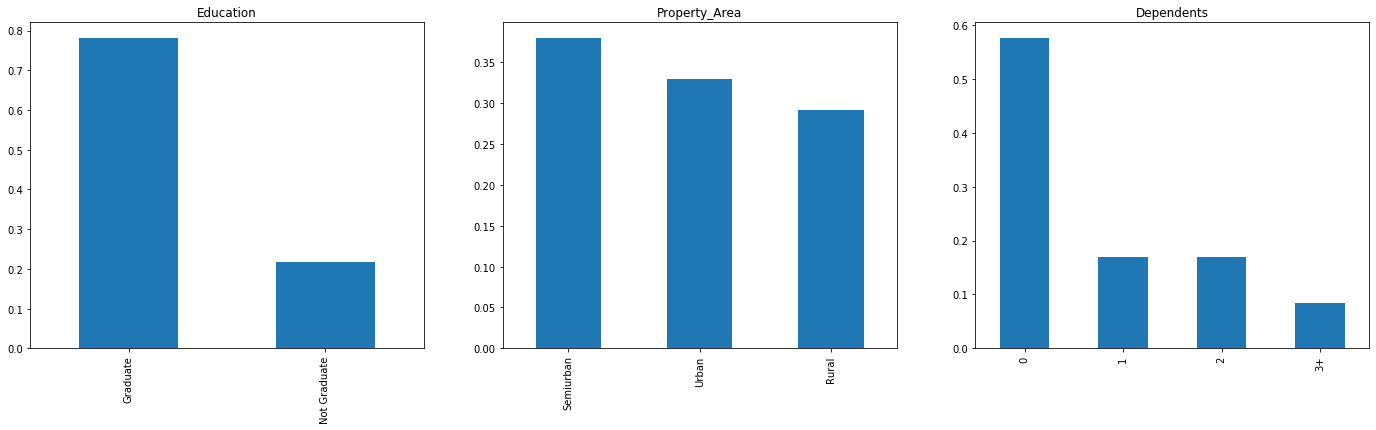

In [10]:
plt.figure(1)
plt.subplot(1,3,1)
train_data['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(1,3,2)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.subplot(1,3,3)
train_data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

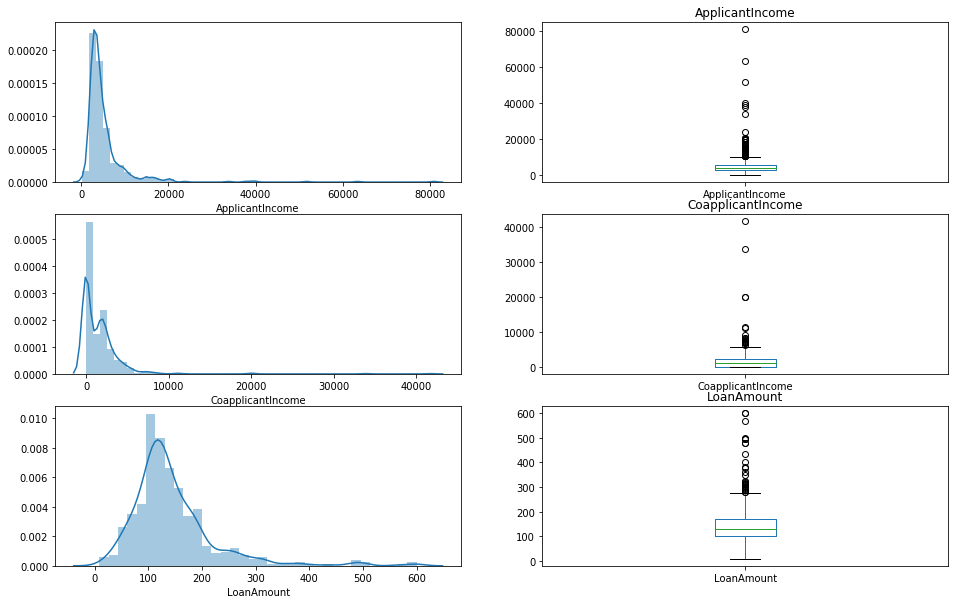

In [11]:
plt.figure(1)
plt.subplot(3,2,1)
sns.distplot(train_data['ApplicantIncome'])
plt.subplot(3,2,2)
train_data['ApplicantIncome'].plot.box(figsize=(16,10),title='ApplicantIncome')
plt.subplot(3,2,3)
sns.distplot(train_data['CoapplicantIncome'])
plt.subplot(3,2,4)
train_data['CoapplicantIncome'].plot.box(title='CoapplicantIncome')
plt.subplot(3,2,5)
df=train_data.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(3,2,6)
df['LoanAmount'].plot.box(title='LoanAmount')
plt.show()

# Bivariant Analysis

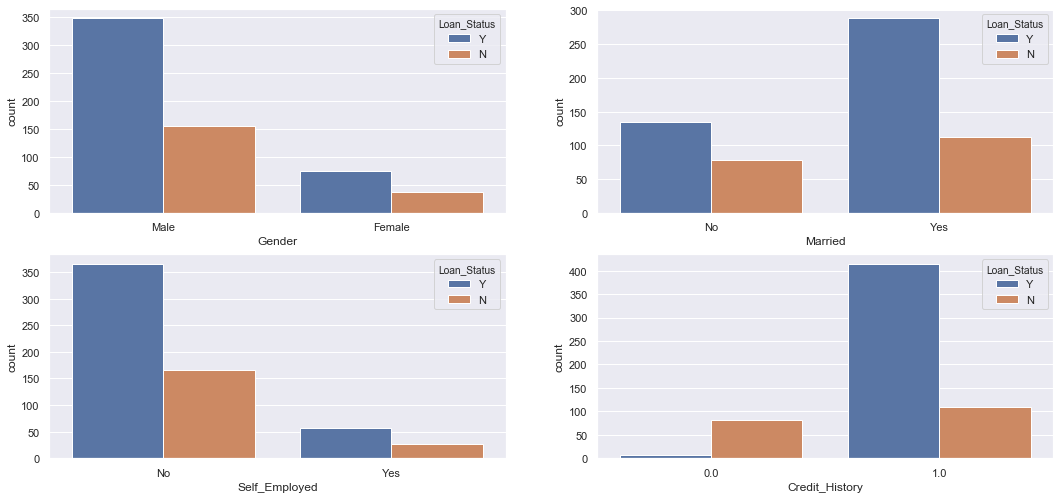

In [16]:
plt.figure(1)
sns.set(rc={'figure.figsize':(36,8.27)})
plt.subplot(2,2,1)
sns.countplot(x='Gender',hue='Loan_Status',data=train_data)
plt.subplot(2,2,2)
sns.countplot(x='Married',hue='Loan_Status',data=train_data)
plt.subplot(2,2,3)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train_data)
plt.subplot(2,2,4)
sns.countplot(x='Credit_History',hue='Loan_Status',data=train_data)
plt.show()

# Missing Values And Outliers

In [13]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [47]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [48]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

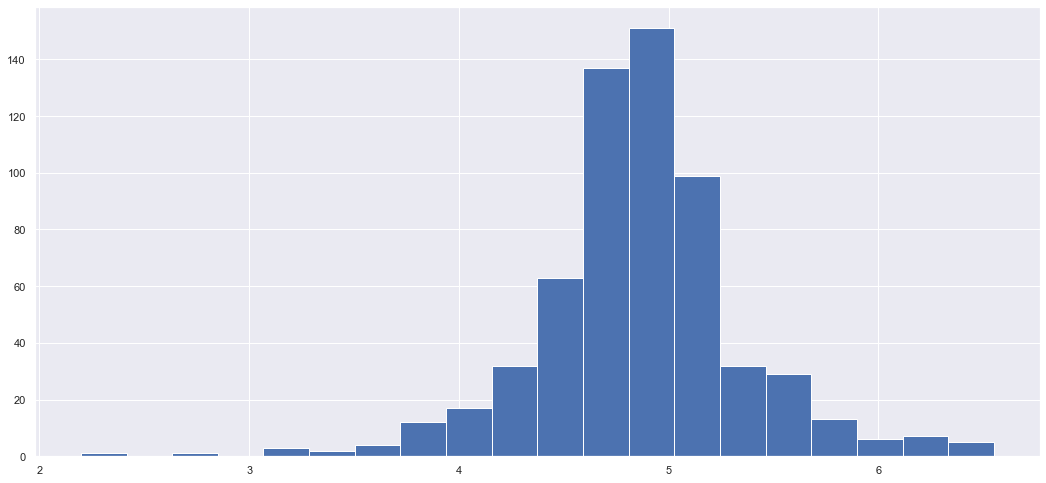

In [31]:
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
#train_data['LoanAmount'].hist(bins=20)

# Categorical Encoding

In [27]:
test_data.drop('Loan_ID',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [34]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']

In [35]:
x=pd.get_dummies(x)
#y=pd.get_dummies(y)

# model building

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25)
y_train

33     Y
162    N
561    Y
231    Y
380    Y
      ..
184    Y
298    N
182    Y
112    N
46     Y
Name: Loan_Status, Length: 460, dtype: object

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_valid)
accuracy_score(y_valid,pred)

C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8246753246753247

In [49]:

#test_data=test_data.drop('Loan_ID',axis=1)
test=pd.get_dummies(test_data)
pred_test=model.predict(test)

In [53]:
submi = pd.read_csv('sample_submission_49d68Cx.csv')
submi['Loan_Status']=pred_test
submi['Loan_ID']=test_data['Loan_ID']

In [54]:
submi['Loan_Status'].replace(0,'N',inplace=True)
submi['Loan_Status'].replace(1,'Y',inplace=True)

In [55]:
pd.DataFrame(submi,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')